# Maskinlæring II: Nevrale nettverk og kunstig intelligens
Kunstige nevrale nettverk har likhetstrekk med hvordan hjernen fungerer. Vi bygger dem opp ved hjelp av _noder_ og _sammmenkoblinger_ mellom nodene, ikke ulikt nerveceller og koblinger mellom dem. Nodene ...

Først trener vi nettverket. Da finner vi ut av hvor mye de ulike koblingene mellom noder skal være _vekta_ for at forskjellene mellom faktiske verdier og forutsigelser skal være så små som mulig. En vekt bestemmer hvor sterk en kobling mellom noder er. Vi måler forskjell mellom forutsigelser og faktiske verdier slik:

$$loss = \Sigma (y - ŷ)^2$$

## Lineær regresjon

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.losses import MeanSquaredError
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

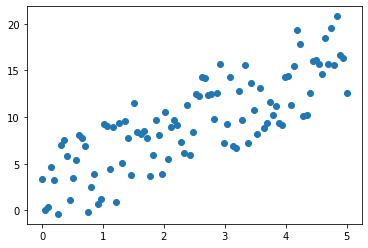

In [28]:
N = 100
x = np.linspace(0,5,N)
y = 3*x + 2 + np.random.uniform(-5,5,N)

plt.scatter(x, y)

Modellen vi kan konstruere fra uttrykket $y = ax + b$ har kun én input-node ($x$) og én output-node ($y$), så det vi må gjøre, er å optimalisere vektingen slik at den nærmer seg _a_, som jo vekter _x_ i funksjonen. Dessuten vil få et et såkalt _bias_-ledd, her representert ved skjæringspunktet _b_ dersom modellen blir trent godt nok.

In [29]:
modell = tf.keras.Sequential()
modell.add(Dense(units=1, activation='linear', input_shape=[1,]))

In [30]:
læringsrate = 0.1  # Hvor fort modellen skal lære
modell.compile(optimizer=Adam(læringsrate), loss = 'mse') # Optimizer = metode for å minimere loss
modell.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Antall parametre er _a_ og _b_ i _y = ax + b_

La oss trene modellen:

In [31]:
modell.fit(x, y, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 104.5022
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 79.3526
Epoch 3/500
4/4 [==============================] - 0s 668us/step - loss: 52.2603
Epoch 4/500
4/4 [==============================] - 0s 667us/step - loss: 36.4380
Epoch 5/500
4/4 [==============================] - 0s 735us/step - loss: 25.8862
Epoch 6/500
4/4 [==============================] - 0s 667us/step - loss: 16.3748
Epoch 7/500
4/4 [==============================] - 0s 667us/step - loss: 11.6355
Epoch 8/500
4/4 [==============================] - 0s 667us/step - loss: 8.3783
Epoch 9/500
4/4 [==============================] - 0s 667us/step - loss: 8.6017
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 8.0945
Epoch 11/500
4/4 [==============================] - 0s 666us/step - loss: 8.6653
Epoch 12/500
4/4 [==============================] - 0s 667us/step - loss: 8.0193
Epoch 13/500
4/4 [=================

4/4 [==============================] - 0s 667us/step - loss: 7.8527
Epoch 103/500
4/4 [==============================] - 0s 666us/step - loss: 8.1321
Epoch 104/500
4/4 [==============================] - 0s 667us/step - loss: 8.2086
Epoch 105/500
4/4 [==============================] - 0s 666us/step - loss: 8.3373
Epoch 106/500
4/4 [==============================] - 0s 666us/step - loss: 8.0878
Epoch 107/500
4/4 [==============================] - 0s 667us/step - loss: 8.3393
Epoch 108/500
4/4 [==============================] - 0s 667us/step - loss: 8.2506
Epoch 109/500
4/4 [==============================] - 0s 666us/step - loss: 8.8073
Epoch 110/500
4/4 [==============================] - 0s 667us/step - loss: 8.6708
Epoch 111/500
4/4 [==============================] - 0s 1ms/step - loss: 7.7170
Epoch 112/500
4/4 [==============================] - 0s 667us/step - loss: 8.4463
Epoch 113/500
4/4 [==============================] - 0s 1000us/step - loss: 8.2755
Epoch 114/500
4/4 [============

4/4 [==============================] - 0s 666us/step - loss: 8.6615
Epoch 203/500
4/4 [==============================] - 0s 667us/step - loss: 8.6208
Epoch 204/500
4/4 [==============================] - 0s 667us/step - loss: 7.7797
Epoch 205/500
4/4 [==============================] - 0s 666us/step - loss: 7.9401
Epoch 206/500
4/4 [==============================] - 0s 666us/step - loss: 8.9828
Epoch 207/500
4/4 [==============================] - 0s 666us/step - loss: 8.4071
Epoch 208/500
4/4 [==============================] - 0s 667us/step - loss: 8.6976
Epoch 209/500
4/4 [==============================] - 0s 666us/step - loss: 8.2943
Epoch 210/500
4/4 [==============================] - 0s 667us/step - loss: 7.9447
Epoch 211/500
4/4 [==============================] - 0s 666us/step - loss: 8.3899
Epoch 212/500
4/4 [==============================] - 0s 668us/step - loss: 8.5703
Epoch 213/500
4/4 [==============================] - 0s 667us/step - loss: 7.8175
Epoch 214/500
4/4 [===========

4/4 [==============================] - 0s 667us/step - loss: 8.0526
Epoch 303/500
4/4 [==============================] - 0s 1ms/step - loss: 8.7330
Epoch 304/500
4/4 [==============================] - 0s 666us/step - loss: 8.7237
Epoch 305/500
4/4 [==============================] - 0s 666us/step - loss: 8.3075
Epoch 306/500
4/4 [==============================] - 0s 666us/step - loss: 8.1864
Epoch 307/500
4/4 [==============================] - 0s 667us/step - loss: 8.6247
Epoch 308/500
4/4 [==============================] - 0s 667us/step - loss: 8.6476
Epoch 309/500
4/4 [==============================] - 0s 667us/step - loss: 8.1792
Epoch 310/500
4/4 [==============================] - 0s 668us/step - loss: 8.7100
Epoch 311/500
4/4 [==============================] - 0s 666us/step - loss: 8.1979
Epoch 312/500
4/4 [==============================] - 0s 999us/step - loss: 8.6113
Epoch 313/500
4/4 [==============================] - 0s 667us/step - loss: 8.6128
Epoch 314/500
4/4 [=============

4/4 [==============================] - 0s 667us/step - loss: 7.8879
Epoch 403/500
4/4 [==============================] - 0s 666us/step - loss: 8.7303
Epoch 404/500
4/4 [==============================] - 0s 667us/step - loss: 7.9645
Epoch 405/500
4/4 [==============================] - 0s 1000us/step - loss: 8.3607
Epoch 406/500
4/4 [==============================] - 0s 666us/step - loss: 8.2445
Epoch 407/500
4/4 [==============================] - 0s 667us/step - loss: 8.1188
Epoch 408/500
4/4 [==============================] - 0s 941us/step - loss: 8.1795
Epoch 409/500
4/4 [==============================] - 0s 670us/step - loss: 8.0516
Epoch 410/500
4/4 [==============================] - 0s 666us/step - loss: 8.4908
Epoch 411/500
4/4 [==============================] - 0s 666us/step - loss: 8.4812
Epoch 412/500
4/4 [==============================] - 0s 667us/step - loss: 8.0266
Epoch 413/500
4/4 [==============================] - 0s 667us/step - loss: 7.9246
Epoch 414/500
4/4 [==========

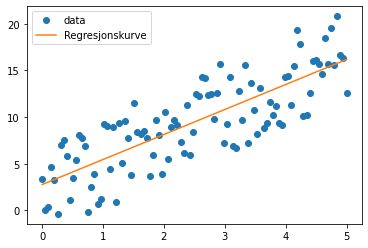

In [32]:
x_fit = np.linspace(0, 5, 100)
y_fit = modell.predict(x_fit)
plt.plot(x, y, linestyle = ' ', marker = 'o', label = 'data')
plt.plot(x_fit, y_fit, label = 'Regresjonskurve')
plt.legend()
plt.show()

In [33]:
y1_test = modell.predict([0,])
y2_test = modell.predict([1,])
print(y1_test, y2_test)

[[2.7689884]] [[5.4485865]]


## Mer avansert regresjon

In [34]:

x2 = np.linspace(-5, 5, 100)
y2 = x2**4 + x2**3 - 15*x2**2 + np.random.uniform(-5,5,100)

modell2 = tf.keras.Sequential([
    Dense(units = 10, input_shape = (1,), activation = 'sigmoid'),
    Dense(units = 1, activation = 'linear')])

modell2.compile(optimizer=Adam(0.1), loss='mse')
modell2.fit(x2, y2, epochs = 500)

Epoch 1/500
4/4 [==============================] - 0s 667us/step - loss: 9846.5271
Epoch 2/500
4/4 [==============================] - 0s 666us/step - loss: 7517.2033
Epoch 3/500
4/4 [==============================] - 0s 667us/step - loss: 6857.6938
Epoch 4/500
4/4 [==============================] - 0s 667us/step - loss: 5900.6629
Epoch 5/500
4/4 [==============================] - 0s 667us/step - loss: 7197.5639
Epoch 6/500
4/4 [==============================] - 0s 1000us/step - loss: 5748.2756
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 7078.3206
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 6448.2610
Epoch 9/500
4/4 [==============================] - 0s 667us/step - loss: 7902.1220
Epoch 10/500
4/4 [==============================] - 0s 999us/step - loss: 6011.5875
Epoch 11/500
4/4 [==============================] - 0s 666us/step - loss: 7185.1816
Epoch 12/500
4/4 [==============================] - 0s 666us/step - loss: 6540.1982
Epoc

4/4 [==============================] - 0s 667us/step - loss: 3234.0952
Epoch 99/500
4/4 [==============================] - 0s 666us/step - loss: 4118.6172
Epoch 100/500
4/4 [==============================] - 0s 1ms/step - loss: 3848.7425
Epoch 101/500
4/4 [==============================] - 0s 668us/step - loss: 2847.9733
Epoch 102/500
4/4 [==============================] - 0s 666us/step - loss: 4392.7742
Epoch 103/500
4/4 [==============================] - 0s 1000us/step - loss: 3297.6202
Epoch 104/500
4/4 [==============================] - 0s 667us/step - loss: 3152.0852
Epoch 105/500
4/4 [==============================] - 0s 667us/step - loss: 3187.5098
Epoch 106/500
4/4 [==============================] - 0s 667us/step - loss: 3343.2998
Epoch 107/500
4/4 [==============================] - 0s 1000us/step - loss: 2826.1402
Epoch 108/500
4/4 [==============================] - 0s 667us/step - loss: 3323.9419
Epoch 109/500
4/4 [==============================] - 0s 667us/step - loss: 3869.

4/4 [==============================] - 0s 666us/step - loss: 1814.0026
Epoch 195/500
4/4 [==============================] - 0s 667us/step - loss: 2598.4723
Epoch 196/500
4/4 [==============================] - 0s 999us/step - loss: 2276.0607
Epoch 197/500
4/4 [==============================] - 0s 667us/step - loss: 1842.0658
Epoch 198/500
4/4 [==============================] - 0s 667us/step - loss: 2516.4747
Epoch 199/500
4/4 [==============================] - 0s 1000us/step - loss: 2698.7970
Epoch 200/500
4/4 [==============================] - 0s 667us/step - loss: 2616.9011
Epoch 201/500
4/4 [==============================] - 0s 666us/step - loss: 2248.4879
Epoch 202/500
4/4 [==============================] - 0s 999us/step - loss: 2327.8718
Epoch 203/500
4/4 [==============================] - 0s 667us/step - loss: 1988.9131
Epoch 204/500
4/4 [==============================] - 0s 667us/step - loss: 2647.0508
Epoch 205/500
4/4 [==============================] - 0s 667us/step - loss: 247

4/4 [==============================] - 0s 667us/step - loss: 1863.6537
Epoch 291/500
4/4 [==============================] - 0s 667us/step - loss: 1473.4835
Epoch 292/500
4/4 [==============================] - 0s 666us/step - loss: 1926.0840
Epoch 293/500
4/4 [==============================] - 0s 668us/step - loss: 1754.7195
Epoch 294/500
4/4 [==============================] - 0s 667us/step - loss: 1532.6767
Epoch 295/500
4/4 [==============================] - 0s 667us/step - loss: 1429.4323
Epoch 296/500
4/4 [==============================] - 0s 1ms/step - loss: 2109.0054
Epoch 297/500
4/4 [==============================] - 0s 666us/step - loss: 1841.1548
Epoch 298/500
4/4 [==============================] - 0s 666us/step - loss: 2027.2667
Epoch 299/500
4/4 [==============================] - 0s 1000us/step - loss: 1759.9251
Epoch 300/500
4/4 [==============================] - 0s 507us/step - loss: 1677.7136
Epoch 301/500
4/4 [==============================] - 0s 1ms/step - loss: 1644.26

4/4 [==============================] - 0s 666us/step - loss: 1557.8197
Epoch 387/500
4/4 [==============================] - 0s 667us/step - loss: 1323.2413
Epoch 388/500
4/4 [==============================] - 0s 1000us/step - loss: 1480.8009
Epoch 389/500
4/4 [==============================] - 0s 666us/step - loss: 1554.0360
Epoch 390/500
4/4 [==============================] - 0s 666us/step - loss: 1233.7350
Epoch 391/500
4/4 [==============================] - 0s 1000us/step - loss: 1612.1095
Epoch 392/500
4/4 [==============================] - 0s 666us/step - loss: 1309.7605
Epoch 393/500
4/4 [==============================] - 0s 1000us/step - loss: 1270.8509
Epoch 394/500
4/4 [==============================] - 0s 667us/step - loss: 1722.0782
Epoch 395/500
4/4 [==============================] - 0s 666us/step - loss: 1548.6975
Epoch 396/500
4/4 [==============================] - 0s 1ms/step - loss: 1403.7559
Epoch 397/500
4/4 [==============================] - 0s 1000us/step - loss: 12

4/4 [==============================] - 0s 666us/step - loss: 1652.5571
Epoch 483/500
4/4 [==============================] - 0s 999us/step - loss: 1252.8741
Epoch 484/500
4/4 [==============================] - 0s 1000us/step - loss: 1463.2430
Epoch 485/500
4/4 [==============================] - 0s 1000us/step - loss: 1600.7218
Epoch 486/500
4/4 [==============================] - 0s 667us/step - loss: 1493.6457
Epoch 487/500
4/4 [==============================] - 0s 667us/step - loss: 1105.8380
Epoch 488/500
4/4 [==============================] - 0s 666us/step - loss: 1257.4162
Epoch 489/500
4/4 [==============================] - 0s 1ms/step - loss: 1193.1010
Epoch 490/500
4/4 [==============================] - 0s 667us/step - loss: 1531.6602
Epoch 491/500
4/4 [==============================] - 0s 667us/step - loss: 1357.7809
Epoch 492/500
4/4 [==============================] - 0s 1000us/step - loss: 1173.1733
Epoch 493/500
4/4 [==============================] - 0s 1ms/step - loss: 1384.

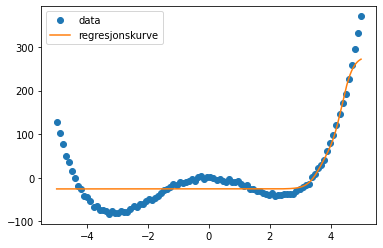

In [35]:
x2_fit = np.linspace(-5, 5, 10000)
y2_fit = modell2.predict(x2_fit)
plt.plot(x2, y2, linestyle = ' ', marker = 'o', label = 'data')
plt.plot(x2_fit, y2_fit, label = 'regresjonskurve')
plt.legend()
plt.savefig("polynomreg1.pdf")

In [36]:
modell3 = tf.keras.Sequential([
    Dense(units = 12, input_shape = (1,), activation = 'sigmoid'),
    Dense(units = 8, activation = 'linear'),
    Dense(units = 6, activation = 'linear'),
    Dense(units = 1, activation = 'linear')])

modell3.compile(optimizer=Adam(0.1), loss='mse')
modell3.fit(x2, y2, epochs = 500)

Epoch 1/500
4/4 [==============================] - 0s 1000us/step - loss: 8789.5694
Epoch 2/500
4/4 [==============================] - 0s 923us/step - loss: 6345.0535
Epoch 3/500
4/4 [==============================] - 0s 1000us/step - loss: 6029.8562
Epoch 4/500
4/4 [==============================] - 0s 666us/step - loss: 5271.6045
Epoch 5/500
4/4 [==============================] - 0s 1000us/step - loss: 5460.2389
Epoch 6/500
4/4 [==============================] - 0s 666us/step - loss: 5319.8144
Epoch 7/500
4/4 [==============================] - 0s 666us/step - loss: 5651.7026
Epoch 8/500
4/4 [==============================] - 0s 667us/step - loss: 5453.8189
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 4450.8942
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 4148.9610
Epoch 11/500
4/4 [==============================] - 0s 667us/step - loss: 4600.5944
Epoch 12/500
4/4 [==============================] - 0s 999us/step - loss: 4384.6699
Ep

4/4 [==============================] - 0s 1000us/step - loss: 1290.4294
Epoch 100/500
4/4 [==============================] - 0s 666us/step - loss: 1264.9052
Epoch 101/500
4/4 [==============================] - 0s 1000us/step - loss: 1185.3240
Epoch 102/500
4/4 [==============================] - 0s 1000us/step - loss: 1206.5858
Epoch 103/500
4/4 [==============================] - 0s 667us/step - loss: 1479.4964
Epoch 104/500
4/4 [==============================] - 0s 1000us/step - loss: 1310.4994
Epoch 105/500
4/4 [==============================] - 0s 667us/step - loss: 1222.5016
Epoch 106/500
4/4 [==============================] - 0s 1ms/step - loss: 1387.1556
Epoch 107/500
4/4 [==============================] - 0s 667us/step - loss: 1634.1143
Epoch 108/500
4/4 [==============================] - 0s 666us/step - loss: 1146.8025
Epoch 109/500
4/4 [==============================] - 0s 1ms/step - loss: 1123.7659
Epoch 110/500
4/4 [==============================] - 0s 999us/step - loss: 1596

4/4 [==============================] - 0s 666us/step - loss: 1261.4720
Epoch 196/500
4/4 [==============================] - 0s 1ms/step - loss: 1363.1085
Epoch 197/500
4/4 [==============================] - 0s 667us/step - loss: 1311.5873
Epoch 198/500
4/4 [==============================] - 0s 668us/step - loss: 1057.1155
Epoch 199/500
4/4 [==============================] - 0s 685us/step - loss: 1555.0469
Epoch 200/500
4/4 [==============================] - 0s 666us/step - loss: 1206.8271
Epoch 201/500
4/4 [==============================] - 0s 1ms/step - loss: 1309.4932
Epoch 202/500
4/4 [==============================] - 0s 1000us/step - loss: 1216.6666
Epoch 203/500
4/4 [==============================] - 0s 666us/step - loss: 1134.7535
Epoch 204/500
4/4 [==============================] - 0s 1000us/step - loss: 1180.2378
Epoch 205/500
4/4 [==============================] - 0s 999us/step - loss: 1118.3349
Epoch 206/500
4/4 [==============================] - 0s 1ms/step - loss: 1422.373

Epoch 292/500
4/4 [==============================] - 0s 1ms/step - loss: 1519.5740
Epoch 293/500
4/4 [==============================] - 0s 1ms/step - loss: 1188.1373
Epoch 294/500
4/4 [==============================] - 0s 666us/step - loss: 1398.1069
Epoch 295/500
4/4 [==============================] - 0s 1000us/step - loss: 1265.9901
Epoch 296/500
4/4 [==============================] - 0s 1ms/step - loss: 1163.9531
Epoch 297/500
4/4 [==============================] - 0s 1ms/step - loss: 1377.6982
Epoch 298/500
4/4 [==============================] - 0s 666us/step - loss: 1273.2436
Epoch 299/500
4/4 [==============================] - 0s 667us/step - loss: 1244.8719
Epoch 300/500
4/4 [==============================] - 0s 1000us/step - loss: 1004.1714
Epoch 301/500
4/4 [==============================] - 0s 666us/step - loss: 1044.0988
Epoch 302/500
4/4 [==============================] - 0s 1000us/step - loss: 938.1519
Epoch 303/500
4/4 [==============================] - 0s 1ms/step - loss

4/4 [==============================] - 0s 666us/step - loss: 1159.8199
Epoch 389/500
4/4 [==============================] - 0s 1000us/step - loss: 1180.8495
Epoch 390/500
4/4 [==============================] - 0s 1ms/step - loss: 975.2523
Epoch 391/500
4/4 [==============================] - 0s 666us/step - loss: 995.8115
Epoch 392/500
4/4 [==============================] - 0s 1ms/step - loss: 1450.3545
Epoch 393/500
4/4 [==============================] - 0s 667us/step - loss: 1594.5259
Epoch 394/500
4/4 [==============================] - 0s 1000us/step - loss: 1290.1917
Epoch 395/500
4/4 [==============================] - 0s 666us/step - loss: 1176.0412
Epoch 396/500
4/4 [==============================] - 0s 1ms/step - loss: 1048.9418
Epoch 397/500
4/4 [==============================] - 0s 666us/step - loss: 1250.0147
Epoch 398/500
4/4 [==============================] - 0s 1000us/step - loss: 1488.9932
Epoch 399/500
4/4 [==============================] - 0s 667us/step - loss: 1803.7824

Epoch 485/500
4/4 [==============================] - 0s 667us/step - loss: 2814.6213
Epoch 486/500
4/4 [==============================] - 0s 999us/step - loss: 2080.7165
Epoch 487/500
4/4 [==============================] - 0s 666us/step - loss: 1506.7127
Epoch 488/500
4/4 [==============================] - 0s 1000us/step - loss: 2203.7045
Epoch 489/500
4/4 [==============================] - 0s 666us/step - loss: 3197.7218
Epoch 490/500
4/4 [==============================] - 0s 1ms/step - loss: 2647.6803
Epoch 491/500
4/4 [==============================] - 0s 999us/step - loss: 1961.8947
Epoch 492/500
4/4 [==============================] - 0s 1ms/step - loss: 1813.8470
Epoch 493/500
4/4 [==============================] - 0s 1000us/step - loss: 1807.7760
Epoch 494/500
4/4 [==============================] - 0s 1ms/step - loss: 2004.5909
Epoch 495/500
4/4 [==============================] - 0s 667us/step - loss: 1356.2910
Epoch 496/500
4/4 [==============================] - 0s 668us/step - 

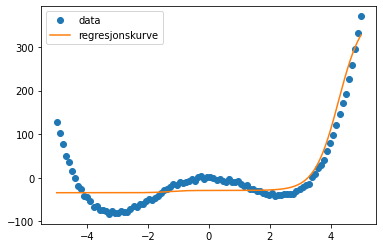

In [37]:
x3_fit = np.linspace(-5, 5, 10000)
y3_fit = modell3.predict(x2_fit)
plt.plot(x2, y2, linestyle = ' ', marker = 'o', label = 'data')
plt.plot(x3_fit, y3_fit, label = 'regresjonskurve')
plt.legend()
plt.savefig("polynomreg2.pdf")

## Eksempel

### Lager datasett

In [38]:
train_labels = []
train_samples = []

# 5 % young did not experience side-effects of a drug, 5 % of older did.
for i in range(50):
    random_younger = np.random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) # side-effects
    
    random_older = np.random.randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0) # not side-effects
    
for i in range(1000):
    random_younger = np.random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0) # not side-effects
    
    random_older = np.random.randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1) # side-effects

In [39]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [40]:
scaler = MinMaxScaler(feature_range=(0,1)) # Normaliserer verdiene mellom 0 og 1
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) # 1D data to 2D

### Bygg modell

In [41]:
"""
#GPU-akselerasjon
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)
"""
None

In [42]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Dense = dense/fully connected layer.
# Activation function: Transformation of input to output.
# list of layers. First is a hidden layer. Last layer is output layer. units 16 and 32 is somewhat arbitrary.
# softmax gives probabilities.

In [43]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_22 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)
#epochs = training iterations. Batch size = training sample size. Verbose: 0, 1 or 2 (level of output)

Epoch 1/30
210/210 - 0s - loss: 0.6871 - accuracy: 0.5157
Epoch 2/30
210/210 - 0s - loss: 0.6470 - accuracy: 0.6371
Epoch 3/30
210/210 - 0s - loss: 0.6139 - accuracy: 0.6857
Epoch 4/30
210/210 - 0s - loss: 0.5794 - accuracy: 0.7381
Epoch 5/30
210/210 - 0s - loss: 0.5439 - accuracy: 0.7767
Epoch 6/30
210/210 - 0s - loss: 0.5107 - accuracy: 0.8081
Epoch 7/30
210/210 - 0s - loss: 0.4784 - accuracy: 0.8371
Epoch 8/30
210/210 - 0s - loss: 0.4481 - accuracy: 0.8533
Epoch 9/30
210/210 - 0s - loss: 0.4208 - accuracy: 0.8719
Epoch 10/30
210/210 - 0s - loss: 0.3961 - accuracy: 0.8824
Epoch 11/30
210/210 - 0s - loss: 0.3750 - accuracy: 0.8967
Epoch 12/30
210/210 - 0s - loss: 0.3565 - accuracy: 0.9062
Epoch 13/30
210/210 - 0s - loss: 0.3408 - accuracy: 0.9138
Epoch 14/30
210/210 - 0s - loss: 0.3279 - accuracy: 0.9195
Epoch 15/30
210/210 - 0s - loss: 0.3170 - accuracy: 0.9214
Epoch 16/30
210/210 - 0s - loss: 0.3084 - accuracy: 0.9229
Epoch 17/30
210/210 - 0s - loss: 0.3007 - accuracy: 0.9257
Epoch 